# FIFA 19 complete player dataset

## Table of Contents

1. [About the data and Problem Statement](#section1)<br>
2. [Importing Packages](#section1)<br>
3. [Data Loading and Description](#section2)<br>
4. [Data Pre-processing](#section1)<br>
5. [Exploratory Data Analysis](#section3)<br>
6. [Preparing X and y and Splitting  into training and test datasets.](#section1)<br>
7. [Machine Learning Algorithmns](#section1)<br>
    - 9.1 [Linear Regression](#section1)<br>
    - 9.1 [Random Forest](#section1)<br>
    - 9.1 [Decision Tree](#section1)<br>
8. [Predictions](#section1)<br>

# 1. About the dataset and problem statement

- The dataset is about the football analytics. It has detailed attributes for every player registered in the latest edition of FIFA 19 database.
- Goal: goal of the project is to explore the Fifa 2019 player data, find relationship and identify the significant features impacting player's potential.(impact the player's overall performance.)

# 2. Importing Packages

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# 3. Data loading and description

In [4]:
data = pd.read_csv("C:/Users/T.R.BASUDE/Downloads/data.csv")
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Description of the dataset

data includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.

In [5]:
data.shape

(18207, 89)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

- ```info``` function gives us the following insights of the dataframe:

  - There are a total of **18207  samples (rows)** and **89 columns** in the dataframe.

In [44]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# 4. Data Pre-processing

In [45]:
#I assigned the ID column as index column as each player should have a unique ID
data.drop(columns = data.iloc[:, :1], inplace = True)
data.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Clean Converting the data types into suitable types. Since Wage and Value cannot be str type. so we convert them to float.

Droping columns We drop all the columns which we do not need for any manupulations i.e from which data we cannot make out any thing.

In [46]:
data[data.columns[data.isna().any()]].isna().sum() # Gets the columns with na values and its count

Club                          241
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF                           2085
RF                           2085
RW                           2085
LAM                          2085
CAM                          2085
RAM                          2085
LM                           2085
LCM                          2085
CM                           2085
RCM           

In [47]:
# Try to get some useful features and this featuref is not null
useful_feat     = ['Name',
                   'Age',
                   'Photo', 
                   'Nationality', 
                   'Flag',
                   'Overall',
                   'Potential', 
                   'Club', 
                   'Club Logo', 
                   'Value',
                   'Wage',
                   'Preferred Foot',
                   'International Reputation',
                   'Weak Foot',
                   'Skill Moves',
                   'Work Rate',
                   'Body Type',
                   'Position',
                   'Joined', 
                   'Contract Valid Until',
                   'Height',
                   'Weight',
                   'Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                   'GKDiving',
                   'GKHandling',
                   'GKKicking',
                   'GKPositioning',
                   'GKReflexes']

In [48]:
df = pd.DataFrame(data, columns=useful_feat)
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


# 5. Exploratory Data Analysis

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

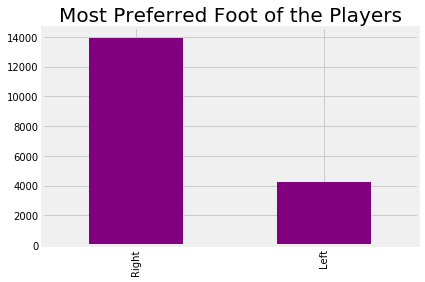

In [10]:


# comparison of preferred foot over the different players

data['Preferred Foot'].value_counts().head(50).plot.bar(color = 'purple')
plt.title('Most Preferred Foot of the Players', fontsize = 20)



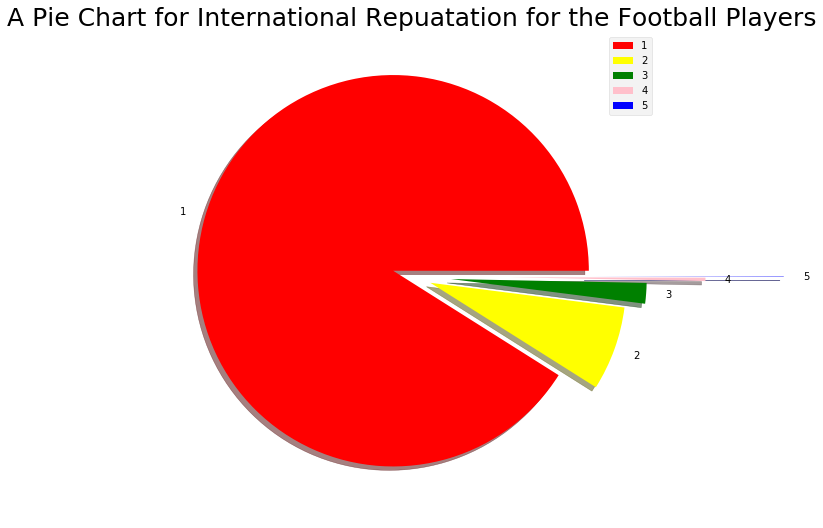

In [11]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Repuatation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

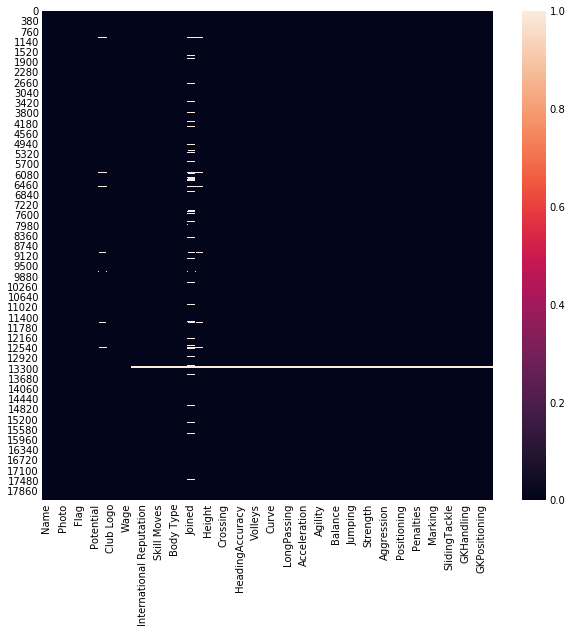

In [18]:
sns.heatmap(data=df.isnull() )
# it seems there is still a lot of null data

Text(0.5, 1.0, 'Age distribution of all players')

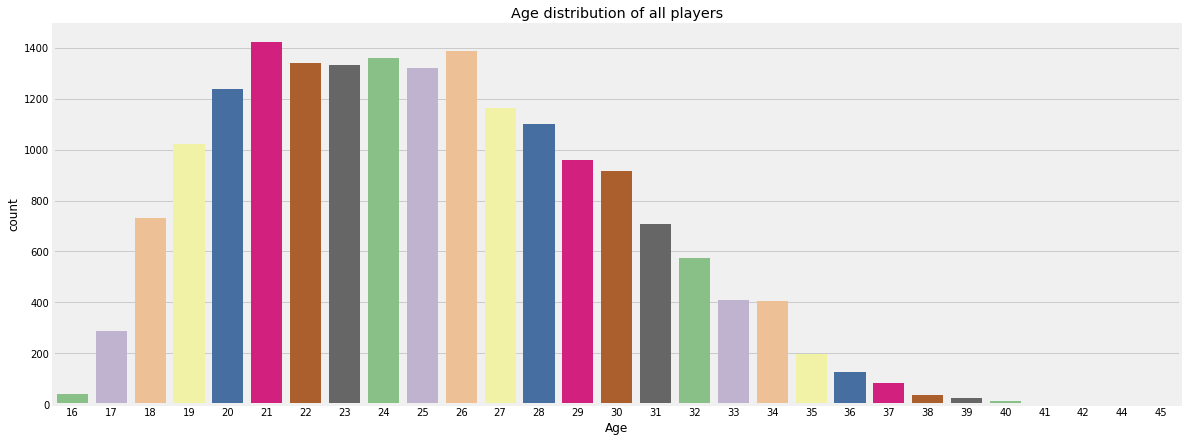

In [19]:
# find the age distribution
plt.figure(1, figsize=(18, 7))
sns.countplot( x= 'Age', data=df, palette='Accent')
plt.title('Age distribution of all players')
# It seems most of the age is distributed form 19 ~ 30

In [20]:
# The eldest players
df.sort_values(by= 'Age', ascending=False)[['Name','Nationality', 'Club', 'Position', 'Overall', 'Age']].head(5)

,Name,Nationality,Club,Position,Overall,Age
4741,O. Pérez,Mexico,Pachuca,GK,71,45
18183,K. Pilkington,England,Cambridge United,GK,48,44
17726,T. Warner,Trinidad & Tobago,Accrington Stanley,GK,53,44
10545,S. Narazaki,Japan,Nagoya Grampus,GK,65,42
7225,C. Muñoz,Argentina,CD Universidad de Concepción,GK,68,41


In [21]:
# The youngest players
df.sort_values(by= 'Age')[['Name','Nationality', 'Club', 'Position', 'Overall', 'Age']].head(5)

,Name,Nationality,Club,Position,Overall,Age
18206,G. Nugent,England,Tranmere Rovers,CM,46,16
17743,J. Olstad,Norway,Sarpsborg 08 FF,ST,52,16
13293,H. Massengo,France,AS Monaco,CDM,62,16
16081,J. Italiano,Australia,Perth Glory,LM,58,16
18166,N. Ayéva,Sweden,Örebro SK,ST,48,16


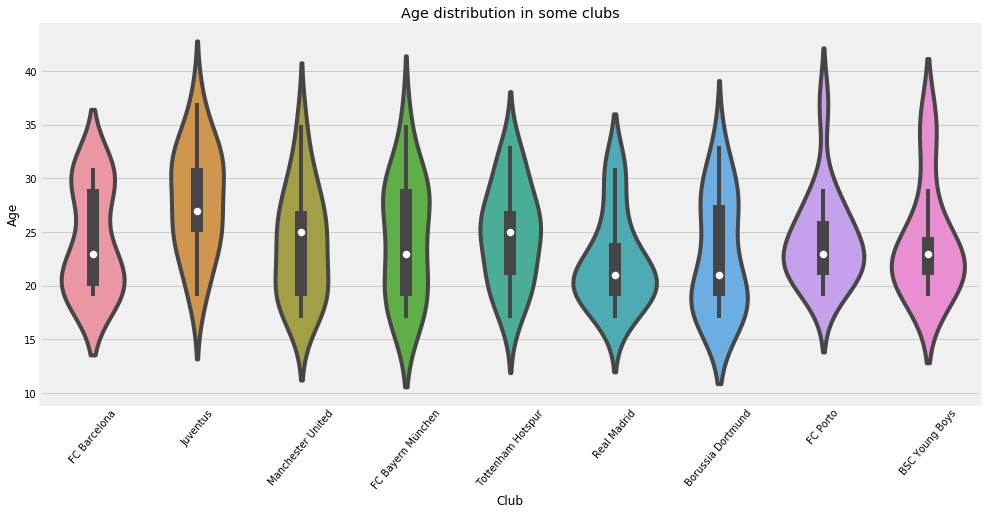

In [22]:
# Age distribution in few famous clubs
vals = ['Tottenham Hotspur' , 'Juventus' , 'Paris Sain-Germain' ,'FC Bayern München',
       'Real Madrid' , 'FC Barcelona' , 'Borussia Dortmund' , 'Manchester United' , 
       'FC Porto' , 'As Monaco' , 'BSC Young Boys']
df_club_age = df.loc[df['Club'].isin(vals) & df['Age']]
plt.figure(1, figsize=(15, 7))
sns.violinplot(x = 'Club', y = 'Age', data = df_club_age )
plt.title('Age distribution in some clubs')
plt.xticks(rotation=50)
plt.show()
# Real madrid is young, Juventus is not very young, Real Madrid perform very good in recent Champions League

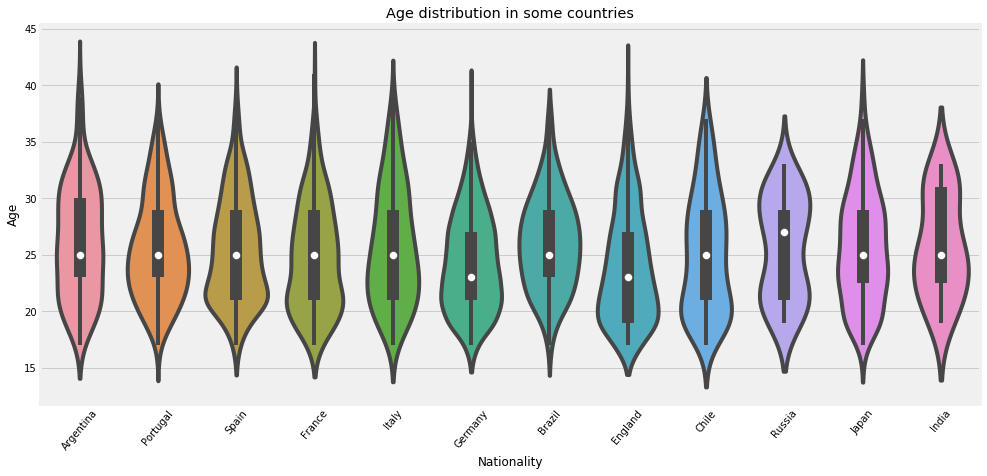

In [23]:
# Age distribution in few countries
vals = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
       'Italy' , 'Spain' , 'Germany' , 'Russia' , 
       'Chile' , 'Japan' , 'India', 'France']
df_age_country = df.loc[df['Nationality'].isin(vals) & df['Age'] ]
plt.figure(1, figsize=(15, 7))
sns.violinplot(x = 'Nationality', y = 'Age', data = df_age_country)
plt.title('Age distribution in some countries')
plt.xticks(rotation = 50)
plt.show()
# It seems very average

In [24]:
# handle all the players
def preprocess_value(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

df['Value'] = df['Value'].apply(preprocess_value)

Text(0.5, 1.0, 'Value distribution of all players')

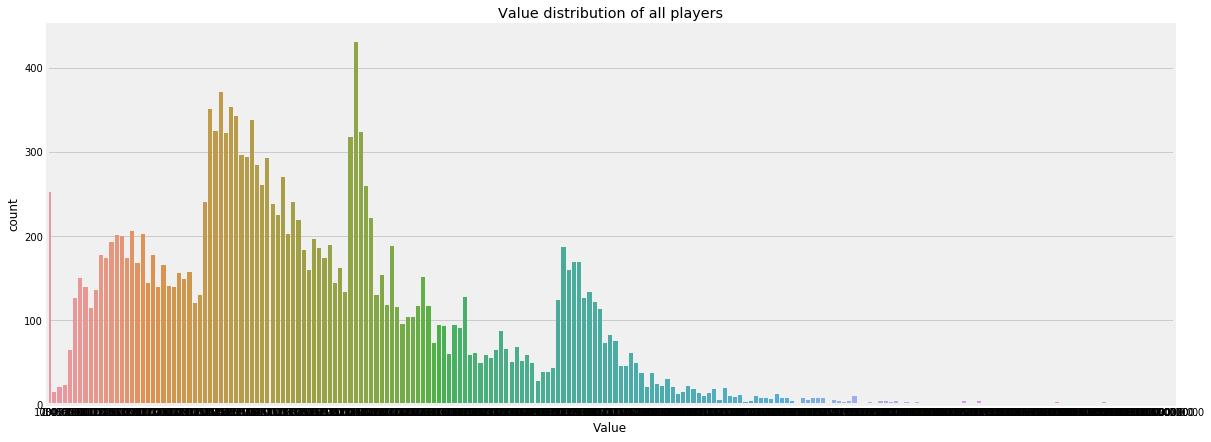

In [25]:
# Value ditribution
plt.figure(1, figsize=(18, 7))
sns.countplot( x= 'Value', data=df)
plt.title('Value distribution of all players')

In [26]:
# find the most expensive players
df.sort_values(by='Value', ascending=False)[['Name','Nationality', 'Club', 'Position', 'Overall', 'Value']].head(5)

,Name,Nationality,Club,Position,Overall,Value
2,Neymar Jr,Brazil,Paris Saint-Germain,LW,92,118500000.0
0,L. Messi,Argentina,FC Barcelona,RF,94,110500000.0
4,K. De Bruyne,Belgium,Manchester City,RCM,91,102000000.0
5,E. Hazard,Belgium,Chelsea,LF,91,93000000.0
15,P. Dybala,Argentina,Juventus,LF,89,89000000.0


In [27]:
# Which club has the average expensive players
Club_value = df.groupby('Club')['Value'].mean()
Club_value.sort_values(ascending=False).head(5)
# These top guys is commen in Champion League

Club
Juventus             2.817900e+07
Real Madrid          2.649773e+07
FC Barcelona         2.583636e+07
Manchester City      2.383500e+07
FC Bayern München    2.341466e+07
Name: Value, dtype: float64

In [28]:
# which club has the highest total value 
club_values =df.groupby('Club')['Value'].sum()
club_values.sort_values(ascending=False).head(5)

Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
Name: Value, dtype: float64

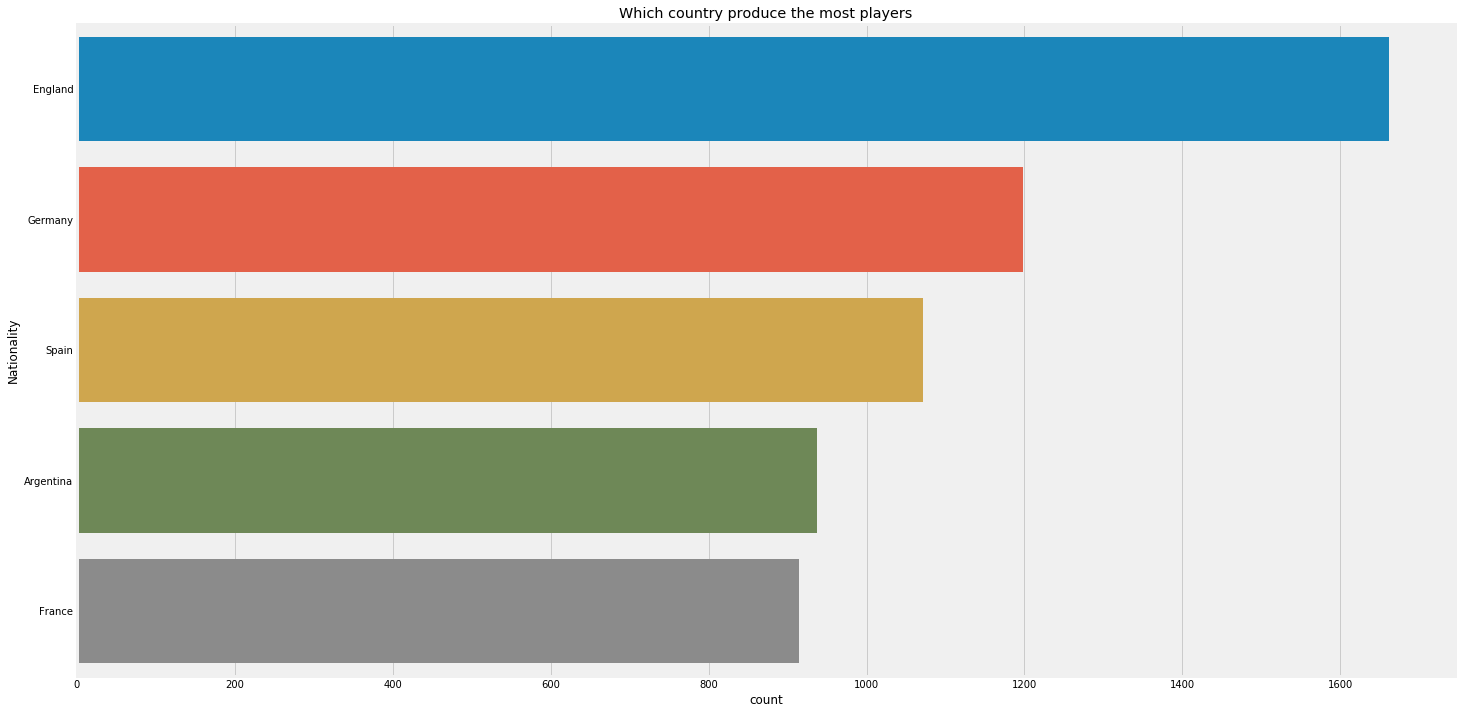

In [29]:
# Nationality players count
plt.figure(1, figsize=(22, 12))
plt.title("Which country produce the most players")
sns.countplot(y = "Nationality", order=df['Nationality'].value_counts().index[0:5] ,data=df)
# England is rich at good football players

In [30]:
#here, we try to do the machine learning of the players overall, it seems we can't include the player of the goalkeeper
# Include all the player except goalkeeper
vals = ['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
ml_players= df.loc[df['Position'].isin(vals) & df['Position']]

In [31]:
# choose all the columns we need
ml_cols =          ['Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                    'Overall'
                   ]

In [32]:
df_ml = pd.DataFrame(data=ml_players, columns=ml_cols)

In [33]:
df_ml.isnull().any()

Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
Overall            False
dtype: bool

# 6. Preparing X and y and Splitting into training and test datasets.

In [34]:
from sklearn.model_selection import train_test_split
y = df_ml['Overall']
X = df_ml[['Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

# 7. Machine Learning Algorithmns

# 7.1 Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
linreg = LinearRegression()

# feeding the training data to the model
linreg.fit(X_train, y_train)

# predicting the test set results
y_pred = linreg.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 6.034732995940099
RMSE : 2.4565693550030496
r2 score : 0.8630153440202147


# 7.2 Random Forest

In [36]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# creating the model
rfr = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfr.fit(X_train, y_train)

# predicting the test set results
y_pred = rfr.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 7.037434406990924
RMSE : 2.652816316104627
r2 score : 0.8402546505586073


# 7.3 Decision tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtr = DecisionTreeRegressor()

# feeding the training data to the model
dtr.fit(X_train, y_train)

# predicting the test set results
y_pred = dtr.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 4.5271317829457365
RMSE : 2.127705755725104
r2 score : 0.8972369464764752


# 8. Predictions

In [38]:
X.columns

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [39]:
x2 = {'Crossing':[86, 80, 91], 'Finishing':[81, 87, 92], 'HeadingAccuracy':[68, 72, 84], 'ShortPassing':[90, 85, 91], 
       'Volleys':[86, 84, 82], 'Dribbling' :[97, 90, 87], 'Curve':[90, 84, 88], 'FKAccuracy' :[79, 84, 90], 
       'LongPassing':[84, 78, 80], 'BallControl':[94, 92, 95], 'Acceleration' :[82, 68, 79], 'SprintSpeed':[80, 78, 80], 
       'Agility' :[85, 80, 86], 'Reactions' :[79, 86, 91], 'Balance':[62, 80, 58], 'ShotPower' :[73, 80, 65], 
       'Jumping' :[86, 90, 65], 'Stamina' :[80, 87, 88], 'Strength':[80, 79, 82], 'LongShots':[72, 58, 50],
       'Aggression':[68, 72, 80], 'Interceptions' :[38, 45, 28], 'Positioning':[82, 88, 93], 'Vision':[50, 87, 79], 
       'Penalties':[65, 76, 81], 'Composure':[84, 88, 90], 'Marking':[40, 50, 62], 'StandingTackle':[37, 51, 29], 
       'SlidingTackle' :[28, 36, 48]}

In [40]:
x3=pd.DataFrame(x2)
x3

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,86,81,68,90,86,97,90,79,84,94,...,72,68,38,82,50,65,84,40,37,28
1,80,87,72,85,84,90,84,84,78,92,...,58,72,45,88,87,76,88,50,51,36
2,91,92,84,91,82,87,88,90,80,95,...,50,80,28,93,79,81,90,62,29,48


In [41]:
pred2 = linreg.predict(x3)
pred2

array([85.305583  , 85.67222033, 90.36515924])

The prediction of overall rating of above 3 observations by linrear regression is 85, 85, 90.

In [42]:
pred2 = rfr.predict(x3)
pred2

array([79.64840551, 86.10820964, 86.10820964])

The prediction of overall rating of above 3 observations by random forest regressor is 79, 86, 86.

In [43]:
pred2 = dtr.predict(x3)
pred2

array([80., 86., 91.])

The prediction of overall rating of above 3 observations by decision tree regressor is 80, 86, 91.